<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

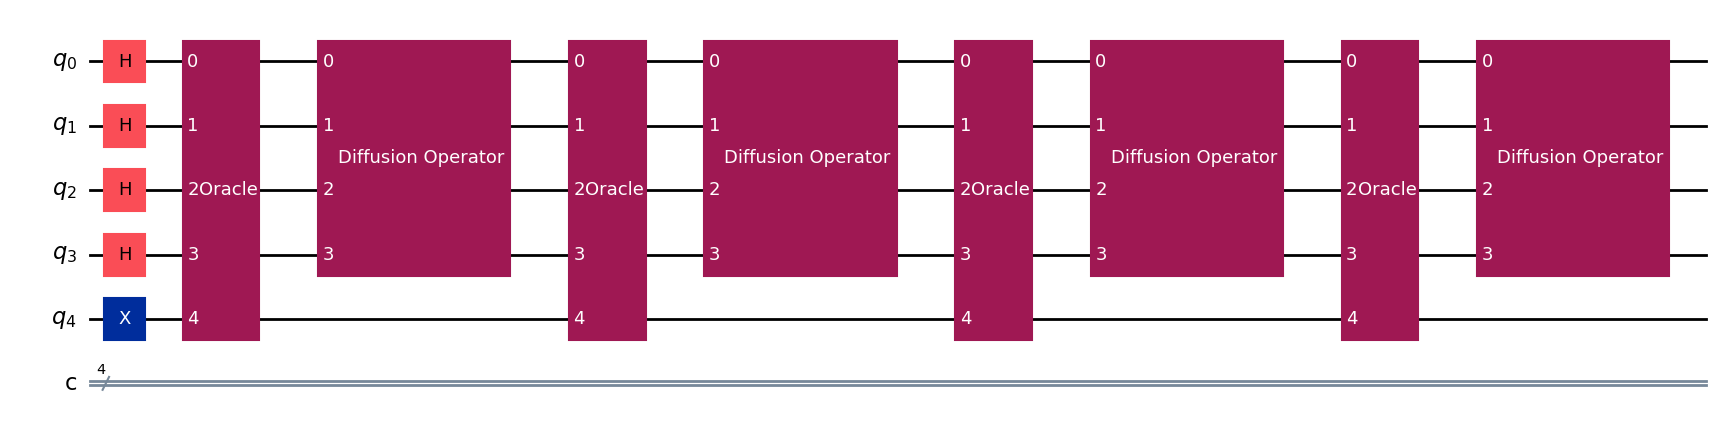

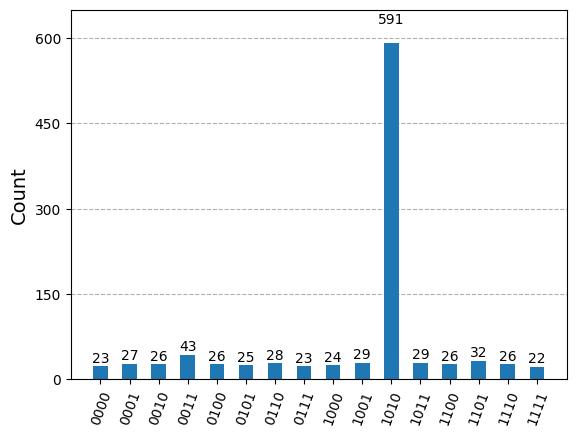

In [2]:
import math
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector
from IPython.display import display, Latex


def Oracle(qbits):
    # Get the number of qubits
    num_qubits = len(qbits)
    
    Qc = QuantumCircuit(num_qubits+1, name = "Oracle")

    for i , v in enumerate(qbits):
        if v == "0":
            Qc.x(i)

    Qc.h(num_qubits)

    Qc.mcx(list(range(num_qubits)), num_qubits)

    Qc.h(num_qubits)

    for i , v in enumerate(qbits):
        if v == "0":
            Qc.x(i)
    return Qc

def DiffusionOperator(qbits):
    # Get the number of qubits
    BitLen = len(qbits) 
    
    Qc = QuantumCircuit(BitLen, name = "Diffusion Operator")
    
    Qc.h(list(range(BitLen)))
    Qc.x(list(range(BitLen)))

    Qc.h(BitLen- 1)

    Qc.mcx(list(range(BitLen - 1)), BitLen - 1)

    Qc.h(BitLen-1)

    Qc.x(list(range(BitLen)))
    Qc.h(list(range(BitLen)))

    return Qc



def MeasureShot(Qc):
    Qc.measure(list(range(Qc.num_qubits - 1)),list(range(Qc.num_qubits - 1)))
    backend = Aer.get_backend('qasm_simulator')
    job = backend.run(Qc, shots=1000)
    result = job.result()
    return result.get_counts()

def GroverResults(counts, BitLen):
    # Identify the bit string with the highest count
    target_bitstring = max(counts, key=counts.get)

    # Convert the bit string to a decimal position
    position = int(target_bitstring, 2)
    
    return position

def GroverSingleBit(bits):
    BitLen = len(bits)
    Qc = QuantumCircuit(BitLen+1 , BitLen)
    Qc.x(BitLen)
    Qc.h(range(BitLen))
    display(Statevector(Qc).draw('latex'))

    for i in range(int(math.sqrt(2 ** BitLen))):
        Qc.append(Oracle(bits), list(range(BitLen+1)))
        display(Statevector(Qc).draw('latex'))
        Qc.append(DiffusionOperator(bits), list(range(BitLen)))
        
    display(Statevector(Qc).draw('latex'))
    return Qc 



nbits = "0101"

GroverCircuit = GroverSingleBit(nbits)
display(GroverCircuit.decompose(gates_to_decompose="").draw('mpl'))
counts = MeasureShot(GroverCircuit.decompose())
plot_histogram(counts)  



<IPython.core.display.Latex object>

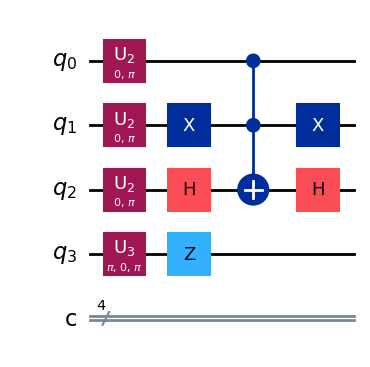

<IPython.core.display.Latex object>

In [3]:
import math
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector
from IPython.display import display, Latex


def DiffusionOperator(qbits):
    # Get the number of qubits
    BitLen = len(qbits) 
    
    Qc = QuantumCircuit(BitLen, name = "Diffusion Operator")
    
    Qc.h(list(range(BitLen)))
    Qc.x(list(range(BitLen)))

    Qc.h(BitLen- 1)

    Qc.mcx(list(range(BitLen - 1)), BitLen - 1)

    Qc.h(BitLen-1)

    Qc.x(list(range(BitLen)))
    Qc.h(list(range(BitLen)))

    return Qc



def MeasureShot(Qc):
    Qc.measure(list(range(Qc.num_qubits - 1)),list(range(Qc.num_qubits - 1)))
    backend = Aer.get_backend('qasm_simulator')
    job = backend.run(Qc, shots=1000)
    result = job.result()
    return result.get_counts()

def GroverResults(counts, BitLen):
    # Identify the bit string with the highest count
    target_bitstring = max(counts, key=counts.get)

    # Convert the bit string to a decimal position
    position = int(target_bitstring, 2)
    
    return position

def MeasureShotx(Qc):
    Qc.measure(list(range(Qc.num_qubits - 2)),list(range(Qc.num_qubits - 2)))
    backend = Aer.get_backend('qasm_simulator')
    job = backend.run(Qc, shots=1000)
    result = job.result()
    return result.get_counts()


def OracleSat(formula):
# Create a quantum circuit with 3 qubits
    Qc = QuantumCircuit(4)
    

    Qc.x(1)

    #Qc.x([0,1])



    #Qc.x([0,1,2])
    Qc.h(2)
    Qc.mcx([0,1], 2)
    Qc.h(2)
    #Qc.z([0,1,2])

    Qc.z(3)
    Qc.x(1)
    #Qc.x([0,1,2])

    #Qc.x([0,1])

    #Qc.cz(4,5)



    return Qc


def GroverSat():
    BitLen = 4
    Qc = QuantumCircuit(BitLen, BitLen)
    Qc.h(range(BitLen-1))
    Qc.x(BitLen-1)
    # display(Statevector(Qc).draw('latex'))
    # Qc.h(range(BitLen))

    

    display(Statevector(Qc).draw('latex'))
    Qc.append(OracleSat(cnf_formula), list(range(BitLen)))
    display(Qc.decompose().draw("mpl"))
    display(Statevector(Qc).draw('latex'))
    # for i in range(int(math.sqrt(2 ** BitLen))):
    #     Qc.append(OracleSat(cnf_formula), list(range(BitLen+1)))
    #     Qc.append(DiffusionOperator("1001"), list(range(BitLen)))
        

    return Qc 


cnf_formula = [(0, True), (1, False), (1, False) ]
GroverSat()

# GroverCircuit = GroverSat(cnf_formula)
# counts = MeasureShotx(GroverCircuit.decompose())
# plot_histogram(counts)  



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

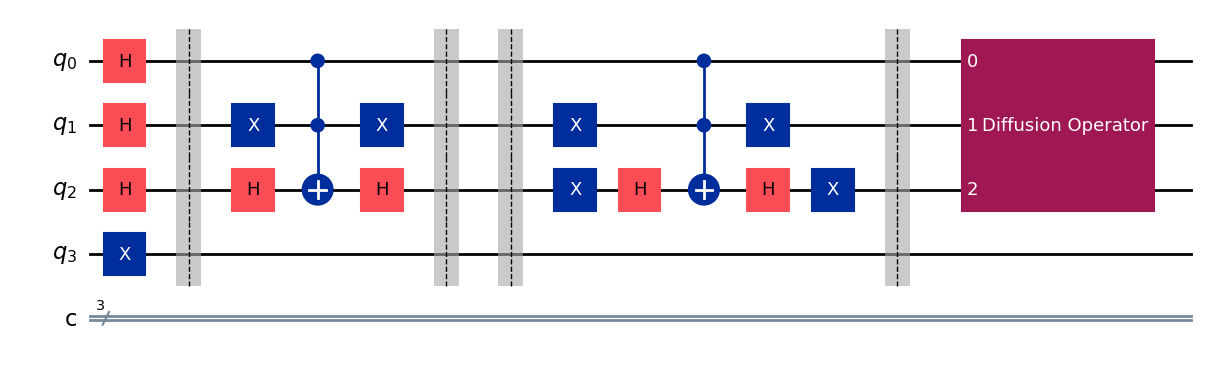

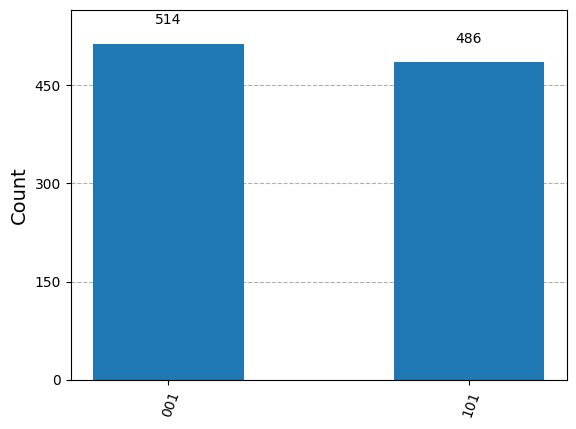

In [8]:
def Oracle2(qubits):
    # Get the number of qubits
    num_qubits = len(qubits[0])
    Qc = QuantumCircuit(num_qubits+1, name = "Oracle")
    
    for index , qbits in enumerate(qubits):
        Qc.barrier()
        Qc.x([i for i , v in enumerate(qbits) if v == "0"])

        Qc.h(num_qubits-1)

        Qc.mcx(list(range(num_qubits-1)), num_qubits-1)

        Qc.h(num_qubits-1)

        Qc.x([i for i , v in enumerate(qbits) if v == "0"])

        
        Qc.barrier()
    return Qc

def DiffusionOperator(qbits):
    # Get the number of qubits
    BitLen = len(qbits) 
    
    Qc = QuantumCircuit(BitLen, name = "Diffusion Operator")
    
    Qc.h(list(range(BitLen)))
    Qc.x(list(range(BitLen)))

    Qc.h(BitLen- 1)

    Qc.mcx(list(range(BitLen - 1)), BitLen - 1)

    Qc.h(BitLen-1)

    Qc.x(list(range(BitLen)))
    Qc.h(list(range(BitLen)))

    return Qc

def GroverMultibitBit(bits):
    BitLen = len(bits[0])
    Qc = QuantumCircuit(BitLen+1 , BitLen)
    Qc.x(BitLen)
    Qc.h(range(BitLen))
    display(Statevector(Qc).draw('latex'))
    #Qc.z(BitLen)

    for i in range(int(math.sqrt((2 ** BitLen)/(2 ** len(bits))))):
        display(Statevector(Qc).draw('latex'))
        Qc.append(Oracle2(bits), list(range(BitLen+1)))
        display(Statevector(Qc).draw('latex'))
        Qc.append(DiffusionOperator(bits[0]), list(range(BitLen)))
        display(Statevector(Qc).draw('latex'))
    return Qc 

nbits = ["101","100"]
GroverCircuit = GroverMultibitBit(nbits)
display(GroverCircuit.decompose(gates_to_decompose="Oracle").draw('mpl'))
counts = MeasureShot(GroverCircuit.decompose())
plot_histogram(counts)

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, AncillaRegister
from qiskit.circuit.library import MCXGate

def create_sat_oracle(cnf_formula):
    """
    Creates a quantum oracle circuit for a given SAT problem in CNF format.
    
    :param cnf_formula: List of clauses, where each clause is a list of tuples.
                        Each tuple represents a literal in the form (var_index, is_negated),
                        where var_index is the index of the variable and is_negated is a boolean.
                        Example: [[(0, False), (1, True)], [(2, False), (3, False)]]
                        represents (x0 OR NOT x1) AND (x2 OR x3).
    :return: A QuantumCircuit object representing the oracle for the SAT problem.
    """
    num_vars = max(var_index for clause in cnf_formula for var_index, _ in clause) + 1
    num_clauses = len(cnf_formula)
    
    # Define quantum registers
    variables = QuantumRegister(num_vars, name='var')
    output = QuantumRegister(1, name='out')
    ancillas = AncillaRegister(num_clauses, name='anc')  # Ancilla qubits for each clause
    circuit = QuantumCircuit(variables, output, ancillas)
    
    # Initialize output qubit in |1> (so it flips if solution is found)
    circuit.x(output[0])
    
    # Build clause circuits
    for clause_idx, clause in enumerate(cnf_formula):
        clause_qubits = []
        
        for var_index, is_negated in clause:
            if is_negated:
                circuit.x(variables[var_index])  # Apply X gate to negate the qubit
            clause_qubits.append(variables[var_index])
        
        # Apply a multi-controlled X gate for the clause, using the ancilla qubit as target
        circuit.mcx(clause_qubits, ancillas[clause_idx])
        
        # Uncompute negations to reset qubits to original state
        for var_index, is_negated in clause:
            if is_negated:
                circuit.x(variables[var_index])
    
    # Use all clause ancillas to control the final output qubit
    circuit.mcx(ancillas, output[0])
    
    # Uncompute clause ancillas to clean up the ancillas
    for clause_idx, clause in enumerate(cnf_formula):
        clause_qubits = []
        
        for var_index, is_negated in clause:
            if is_negated:
                circuit.x(variables[var_index])  # Apply X gate again to reset negation
            clause_qubits.append(variables[var_index])
        
        # Uncompute the multi-controlled X gate
        circuit.mcx(clause_qubits, ancillas[clause_idx])
        
        # Reset negations again
        for var_index, is_negated in clause:
            if is_negated:
                circuit.x(variables[var_index])
    
    # Flip output back to |0> for consistency
    circuit.x(output[0])
    
    return circuit


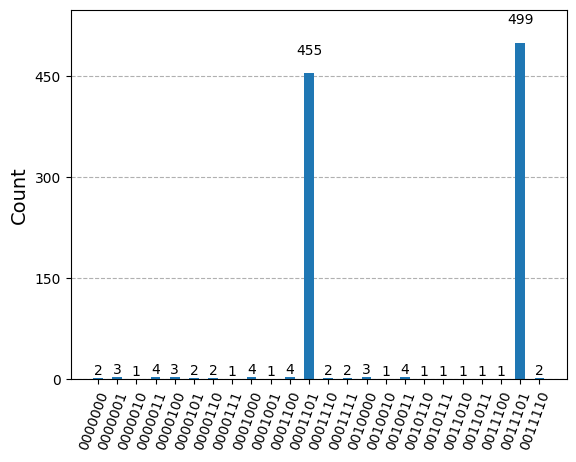

In [6]:
from qiskit import QuantumCircuit
import numpy as np

# Reuse the create_sat_oracle function from previous code
def create_sat_oracle(cnf_formula):
    num_vars = max(var_index for clause in cnf_formula for var_index, _ in clause) + 1
    num_clauses = len(cnf_formula)
    
    variables = QuantumRegister(num_vars, name='var')
    output = QuantumRegister(1, name='out')
    ancillas = AncillaRegister(num_clauses, name='anc')
    circuit = QuantumCircuit(variables, output, ancillas)
    
    # Initialize output qubit in |1> so it flips if solution is found
    circuit.x(output[0])
    
    for clause_idx, clause in enumerate(cnf_formula):
        clause_qubits = []
        
        for var_index, is_negated in clause:
            if is_negated:
                circuit.x(variables[var_index])
            clause_qubits.append(variables[var_index])
        
        circuit.mcx(clause_qubits, ancillas[clause_idx])
        
        for var_index, is_negated in clause:
            if is_negated:
                circuit.x(variables[var_index])
    
    circuit.mcx(ancillas, output[0])
    
    for clause_idx, clause in enumerate(cnf_formula):
        clause_qubits = []
        
        for var_index, is_negated in clause:
            if is_negated:
                circuit.x(variables[var_index])
            clause_qubits.append(variables[var_index])
        
        circuit.mcx(clause_qubits, ancillas[clause_idx])
        
        for var_index, is_negated in clause:
            if is_negated:
                circuit.x(variables[var_index])
    
    circuit.x(output[0])
    
    return circuit

# Define the Grover diffusion operator
def diffusion_operator(n):
    circuit = QuantumCircuit(n)
    circuit.h(range(n))
    circuit.x(range(n))
    circuit.h(n - 1)
    circuit.mcx(list(range(n - 1)), n - 1)
    circuit.h(n - 1)
    circuit.x(range(n))
    circuit.h(range(n))
    return circuit

# Define the SAT problem in CNF form
cnf_formula = [
    [(0, False), (1, True)],   # Clause 1: x1 OR NOT x2
    [(2, False), (3, False)]   # Clause 2: x3 OR x4
]

# Number of variables and qubits required
num_vars = max(var_index for clause in cnf_formula for var_index, _ in clause) + 1
oracle = create_sat_oracle(cnf_formula)

# Create the Grover's circuit
grover_circuit = QuantumCircuit(num_vars + 1 + len(cnf_formula), name="Grover")

# Initialize the qubits in superposition
grover_circuit.h(range(num_vars))

# Prepare the output qubit in |1>
grover_circuit.x(num_vars)
grover_circuit.h(num_vars)

# Number of iterations for Grover's algorithm
num_iterations = int(np.pi / 4 * np.sqrt(2 ** num_vars))

# Apply Grover's iterations
for _ in range(num_iterations):
    grover_circuit.append(oracle.to_instruction(), range(num_vars + 1 + len(cnf_formula)))
    diffusion = diffusion_operator(num_vars)
    grover_circuit.append(diffusion, range(num_vars))

# Measure the variable qubits
grover_circuit.measure_all()

counts = MeasureShot(grover_circuit.decompose())
plot_histogram(counts) 

In [7]:
cnf_formula = [
    [(0, False), (1, True)],   # Clause 1: x1 OR NOT x2
    [(2, False), (3, False)]   # Clause 2: x3 OR x4
]

# Create the oracle
oracle = create_sat_oracle(cnf_formula)

# Visualize the circuit (optional)
print(oracle)


                                               
var_0: ────────────■───────────────────■───────
       ┌───┐       │  ┌───┐┌───┐       │  ┌───┐
var_1: ┤ X ├───────■──┤ X ├┤ X ├───────■──┤ X ├
       └───┘       │  └───┘└───┘       │  └───┘
var_2: ───────■────┼─────────■─────────┼───────
              │    │         │         │       
var_3: ───────■────┼─────────■─────────┼───────
       ┌───┐  │    │  ┌───┐  │  ┌───┐  │       
  out: ┤ X ├──┼────┼──┤ X ├──┼──┤ X ├──┼───────
       └───┘  │  ┌─┴─┐└─┬─┘  │  └───┘┌─┴─┐     
anc_0: ───────┼──┤ X ├──■────┼───────┤ X ├─────
            ┌─┴─┐└───┘  │  ┌─┴─┐     └───┘     
anc_1: ─────┤ X ├───────■──┤ X ├───────────────
            └───┘          └───┘               
